In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

# 1.

In [2]:
def regression_var_criterion(X,y,t):
    a = np.concatenate((X.reshape(-1,1),y.reshape(-1,1)), axis=1)
    return np.var(a[:, 1]) - np.var(a[a[:,0]<t].reshape(-1,2)[:,1]) - np.var(a[a[:,0]>=t].reshape(-1,2)[:,1])
# t = 2
# np.var(a[:, 1]) - np.var(a[a<t].reshape(-1,2)[:,1]) - np.var(a[a>=t].reshape(-1,2)[:,1])
# np.var(a[a[:,0]<=t].reshape(-1,2)[:,1])
# np.var(a[a<=t].reshape(-1,2)[:,1])
# regression_var_criterion(X,y,0)
# np.var(a[:, 1]) - np.var(a[a[:,0]<-1.9][:,1]) - np.var(a[a[:,0]>=-1.9][:,1])

In [ ]:
plt.subplots(figsize = (12,5))
# X = np.linspace(-2, 2, 100)
# y = np.array([x**3 for x in X])
X = np.linspace(-2, 2, 7)
y = X ** 3

T = np.linspace(-1.9, 1.9, 100)
plt.scatter(X,y)
plt.scatter(T, [regression_var_criterion(X,y,t) for t in T])

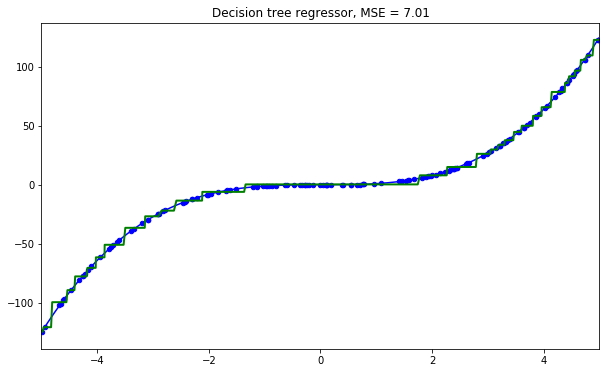

In [4]:
n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return x ** 3

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = X ** 3 + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)


reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % (np.sum((y_test - reg_tree_pred) ** 2) / n_test))
plt.show()

# 3.

In [95]:
# df = pd.read_csv("../../downloads/mlbootcamp5_train.csv",
#                 index_col = "id", sep=';')
df = pd.read_csv("mlbootcamp5_train.csv",
                index_col = "id", sep=';')

In [7]:
df['age'] = df['age'].map(lambda x: x // 365.25)

In [8]:
a = list(df['cholesterol'].values)

In [11]:
from sklearn.preprocessing import OneHotEncoder
object_cols = ["cholesterol","gluc"]
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))
OH_cols.index = df.index
OH_cols.columns = ['chol_norm','chol_abv','chol_well','gluc_norm','gluc_abv','gluc_well']
num = df.drop(object_cols, axis=1)
OH = pd.concat([num,OH_cols], axis=1)
# OH

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(OH.drop(["cardio"], axis=1), OH["cardio"],
                                                    test_size=0.3, random_state=17)

In [13]:
model = DecisionTreeClassifier(random_state=17, max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

In [92]:
pred = model.predict(X_valid)
acc1 = accuracy_score(pred, y_valid)

In [93]:
model2 = DecisionTreeClassifier(random_state=17, max_depth=6)
model2.fit(X_train,y_train)
pred = model2.predict(X_valid)
acc2 = accuracy_score(pred, y_valid)
(acc2 - acc1) / acc1 * 100

0.6073809995378613

In [16]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [80]:
params = {"max_depth": np.arange(2,11)}#, "min_samples_leaf": np.arange(2,11)}
best_tree = GridSearchCV(estimator = model, param_grid=params, cv=5, n_jobs=-1, verbose=1)

In [81]:
best_tree.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    6.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
             pre_dispatch='2*n_jobs', refit=True, return_tr

In [94]:
best_tree.best_params_

{'max_depth': 6}

In [83]:
best_tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

In [84]:
best_tree.best_score_

0.7322244897959184

In [85]:
best_tree.cv_results_

{'mean_fit_time': array([0.13445373, 0.19227858, 0.10814552, 0.13291736, 0.18506575,
        0.18775535, 0.19353876, 0.24969778, 0.24081373]),
 'std_fit_time': array([0.04486534, 0.07242167, 0.00338363, 0.0048958 , 0.02684082,
        0.0368089 , 0.00986004, 0.04108554, 0.07450905]),
 'mean_score_time': array([0.03614016, 0.00738525, 0.00726128, 0.00742559, 0.00807095,
        0.00743737, 0.00805354, 0.00950675, 0.00870209]),
 'std_score_time': array([0.0397996 , 0.00070722, 0.00065854, 0.00052819, 0.00067514,
        0.00024318, 0.00032577, 0.0020151 , 0.00365282]),
 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 9},
  {'max_depth': 10}],
 'split0_t

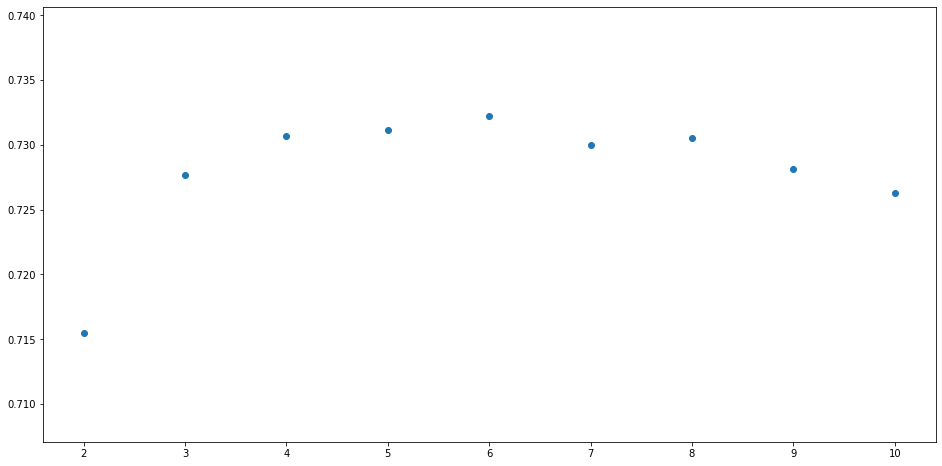

In [86]:
plt.subplots(figsize=(16,8))
XX = np.arange(2,11)
y_mean_acc = best_tree.cv_results_['mean_test_score']
# y_mean_acc.max()
plt.scatter(XX,y_mean_acc)

In [49]:
plt.subplots(figsize=(500,40))
plot_tree(best_tree.best_estimator_, filled=True, node_ids = True, feature_names=X_train.columns)
plt.show()

In [43]:
drop = ["height","weight","gluc_norm","gluc_abv","gluc_well","active","alco","ap_lo"]
OH_2 = OH.drop(drop, axis=1)

age_40_50 = []
age_50_55 = []
age_55_60 = []
age_60_65 = []
for age in OH['age']:
    if 40 <= age < 50:
        age_40_50.append(1)
        age_50_55.append(0)
        age_55_60.append(0)
        age_60_65.append(0)
    elif 50 <= age < 55:
        age_40_50.append(0)
        age_50_55.append(1)
        age_55_60.append(0)
        age_60_65.append(0)
    elif 55 <= age < 60:
        age_40_50.append(0)
        age_50_55.append(0)
        age_55_60.append(1)
        age_60_65.append(0)
    elif 60 <= age < 65:
        age_40_50.append(0)
        age_50_55.append(0)
        age_55_60.append(0)
        age_60_65.append(1)
    else:
        age_40_50.append(0)
        age_50_55.append(0)
        age_55_60.append(0)
        age_60_65.append(0)

sys_group = {'40-49': age_40_50,
            '50-54' : age_50_55,
            '55-59' : age_55_60,
            '60-64' : age_60_65}

sys_120_140 = []
sys_140_160 = []
sys_160_180 = []
for sys in OH['ap_hi']:
    if 120 <= sys < 140:
        sys_120_140.append(1)
        sys_140_160.append(0)
        sys_160_180.append(0)
    elif 140 <= sys < 160:
        sys_120_140.append(0)
        sys_140_160.append(1)
        sys_160_180.append(0)
    elif 160 <= sys < 180:
        sys_120_140.append(0)
        sys_140_160.append(0)
        sys_160_180.append(1)
    else:
        sys_120_140.append(0)
        sys_140_160.append(0)
        sys_160_180.append(0)

age_group = {'120-139': sys_120_140,
            '140-159' : sys_140_160,
            '160-179' : sys_160_180}

OH_3 = OH_2.drop(['age','ap_hi'], axis=1)

for i,x in enumerate(age_group):
    OH_3[x] = age_group[x]
    
for i,x in enumerate(sys_group):
    OH_3[x] = sys_group[x]

gender  smoke  cardio  chol_norm  chol_abv  chol_well  120-139  \
id                                                                      
0           2      0       0        1.0       0.0        0.0        0   
1           1      0       1        0.0       0.0        1.0        0   
2           1      0       1        0.0       0.0        1.0        1   
3           2      0       1        1.0       0.0        0.0        0   
4           1      0       0        1.0       0.0        0.0        0   
...       ...    ...     ...        ...       ...        ...      ...   
99993       2      1       0        1.0       0.0        0.0        1   
99995       1      0       1        0.0       1.0        0.0        0   
99996       2      0       1        0.0       0.0        1.0        0   
99998       1      0       1        1.0       0.0        0.0        1   
99999       1      0       0        0.0       1.0        0.0        1   

       140-159  160-179  40-49  50-54  55-59  60-64  
id                                                   
0            0        0      0      1      0      0  
1            1        0      0      0      1      0  
2            0        0      0      1      0      0  
3            1        0      1      0      0      0  
4            0        0      1      0      0      0  
...        ...      ...    ...    ...    ...    ...  
99993        0        0      0      1      0      0  
99995        1        0      0      0      0      1  
99996        0        0      0      1      0      0  
99998        0        0      0      0      0      1  
99999        0        0      0      0      1      0  

[70000 rows x 13 columns]

In [45]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
OH_3['gender'] = label_encoder.fit_transform(OH['gender'])
OH_3

gender  smoke  cardio  chol_norm  chol_abv  chol_well  120-139  \
id                                                                      
0           1      0       0        1.0       0.0        0.0        0   
1           0      0       1        0.0       0.0        1.0        0   
2           0      0       1        0.0       0.0        1.0        1   
3           1      0       1        1.0       0.0        0.0        0   
4           0      0       0        1.0       0.0        0.0        0   
...       ...    ...     ...        ...       ...        ...      ...   
99993       1      1       0        1.0       0.0        0.0        1   
99995       0      0       1        0.0       1.0        0.0        0   
99996       1      0       1        0.0       0.0        1.0        0   
99998       0      0       1        1.0       0.0        0.0        1   
99999       0      0       0        0.0       1.0        0.0        1   

       140-159  160-179  40-49  50-54  55-59  60-64  
id                                                   
0            0        0      0      1      0      0  
1            1        0      0      0      1      0  
2            0        0      0      1      0      0  
3            1        0      1      0      0      0  
4            0        0      1      0      0      0  
...        ...      ...    ...    ...    ...    ...  
99993        0        0      0      1      0      0  
99995        1        0      0      0      0      1  
99996        0        0      0      1      0      0  
99998        0        0      0      0      0      1  
99999        0        0      0      0      1      0  

[70000 rows x 13 columns]

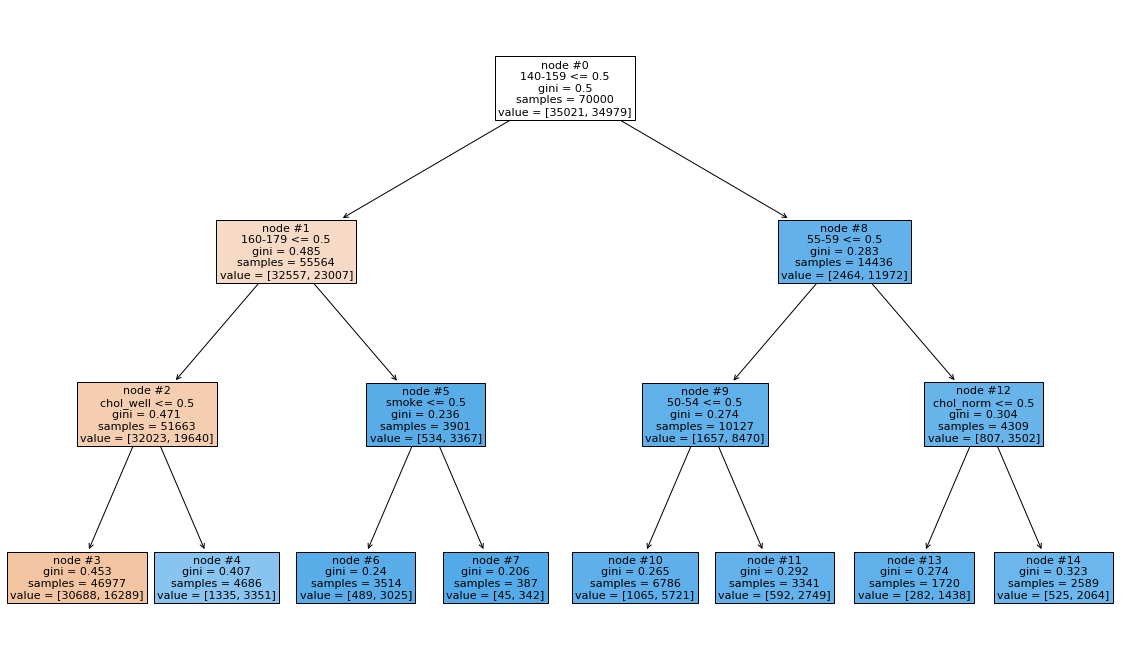

In [46]:
plt.figure(figsize=(20,12))
my_tree = DecisionTreeClassifier(random_state=17, max_depth=3)
my_tree.fit(OH_3.drop('cardio', axis = 1), OH_3['cardio'])
plot_tree(my_tree, filled=True, node_ids=True, feature_names=OH_3.drop('cardio', axis = 1).columns)
plt.show()